In [20]:
from numpy import arange

from functions_fuzzy import func_nao_linear

import math

import numpy as np

from matplotlib import pyplot as plt

from functions_fuzzy import Trapezoidal, trapezoidal

In [21]:
print(arange(0, 4, 0.3))

[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3.  3.3 3.6 3.9]


### Gere um conjunto de dados com valores de x no intervalo de [0,10] e calcule os valores correspondentes de f(x) para esses pontos. Atenc ¸˜ao para gerar um n´ umero suficiente de pontos.

In [22]:
samples = [
    arange(0, 10, 0.4),
    arange(0, 10, 0.1),
    arange(0, 10, 0.2),
    arange(0, 10, 0.3),
    arange(0, 10, 0.4),
    arange(0, 10, 0.5),
    arange(0, 10, 0.6),
    arange(0, 10, 0.7),
    arange(0, 10, 0.8),
    arange(0 ,10, 0.9),
    arange(3, 9, 0.4),
    arange(2, 8, 0.4),
    arange(2, 9, 0.4),
    arange(2, 10, 0.4),
    arange(1, 7, 0.4),
    arange(1, 8, 0.4),
    arange(1, 9, 0.4),
    arange(2, 10, 0.3),
    arange(1, 7, 0.3),
    arange(1, 8, 0.3),
    arange(1, 9, 0.3)
] # Geração de 17 amostras com diferentes intervalos entre 0 e 10


# Gerando amostragem "Aleatória" sob a amostragem prévia
complete_sampling = [round(float(x[9]), 5) for x in samples]

complete_output = [round(func_nao_linear(x), 7) for x in complete_sampling]

print(complete_sampling)

print(complete_output)

print(len(samples))


x_suave = np.linspace(0, 10, 200)

[3.6, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 6.6, 5.6, 5.6, 5.6, 4.6, 4.6, 4.6, 4.7, 3.7, 3.7, 3.7]
[0.265492, 1.2269337, 1.1846001, 0.7964382, 0.265492, -0.0821954, -0.0467867, 0.292061, 0.6337617, 0.6828436, 0.422906, 0.0106465, 0.0106465, 0.0106465, -0.0983265, -0.0983265, -0.0983265, -0.1093338, 0.2121958, 0.2121958, 0.2121958]
21


In [23]:
# Gerando os centros

x = [0, 0.5, 0.6, 1] # Trapezoidal

#  f(x)<−0.5         Antes da onda	        Sem risco
# −0.5<f(x)<−0.25	Início da perturbação	Risco leve
# −0.25<f(x)<0.25	Turbulência máxima	    Risco extremo
# 0.25<f(x)<0.5      Ondas diminuindo    	Risco moderado
# f(x)>0.5           Mar se acalmando	    Risco leve ou sem risco


conjuntos ={
    "Sem risco" : [0, 2.2, 3.4, 3.6],
    "Risco leve" : [3.2, 4, 4.5, 5.2],
    "Risco extremo" : [4.8, 5.1, 5.6, 6],
    "Risco moderado" : [5.7, 7, 7.4, 8],
    "Risco leve ou sem risco" : [7.8, 8, 9.2, 10]
}


In [24]:
pertinencias = {}

print(type(complete_sampling))

# trapezoidal(complete_sampling, 1, 2, 3, 4)
for nome, (a,b,c,d) in conjuntos.items():
    pertinencias[nome] = trapezoidal(complete_sampling, a, b, c, d)

<class 'list'>


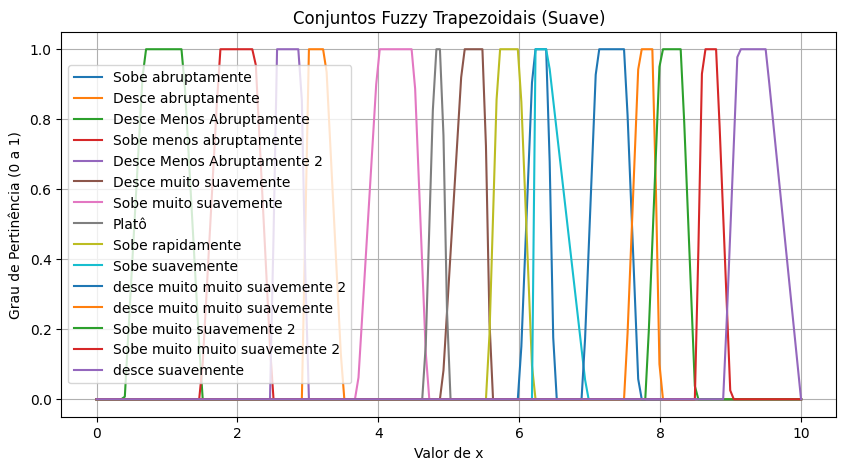

In [ ]:


# Gera muitos pontos igualmente espaçados entre 0 e 10
x_suave = np.linspace(0, 10, 200)

conjuntos = {
    # Comportamentos Abruptos
    "Sobe abruptamente": [0, 0.25, 0.35, 0.5], #f
    "Desce abruptamente": [0.55, 0.65, 0.9, 1], #h
    
    # Comportamentos "Menos Abruptos" (transições moderadas)
    "Desce Menos Abruptamente": [0.8, 9, 1.4, 1.5], #i  # Cobre 1-1.5
    "Sobe menos abruptamente": [1.48, 1.75, 1.9, 2], #j   # Cobre 1.5-2

    "Desce Menos Abruptamente 2": [1.95, 2.10, 2.45, 2.52], #k  # Cobre 2.5-3
    "Desce muito suavemente": [2.5, 2.55, 2.95, 3.05], #l       # Cobre 2.5 - 3
    "Desce Abruptamente" : [2.9, 3, 3.45, 3.5] #m  Cobre 3 - 3.5

    "Desce muito muito suavemente": [3.48, 3.52, 3.7, 3.75], #n1       # Cobre 3.5-3.74
    "Sobe suavemente": [3.745, 3.8, 4.1, 4.2], #n2      # Cobre 3.74-4 

    # Comportamentos Suaves
    "Sobe": [4.15, 4.3, 4.4, 4.5], #o       # Cobre 4-4.5 

    "platô" : [4.45, 4.5, 4.6, 4.68] #p1 Cobre 4.5- 4.68
    "Desce muito muito suavemente" :  [4.65, 4.7, 4.9, 5] #p2 Cobre 4.65 - 5



    "Platô": [4.65, 4.8, 4.9, 5], # Platô
    "Desce muito suavemente" : [4.9, 5.2, 5.5, 5.6],                     # Ponto de platô
    "Sobe rapidamente": [5.55, 5.7, 6.0, 6.2],       # Cobre 5.6-6
    
    # Comportamentos Suaves Adicionais
    "Sobe abruptamente": [6.0, 6.2, 6.4, 6.5],              # Cobre 6-6.5
    "Sobe suavemente": [6.4, 6.2, 6.4, 6.966],              # Cobre 6-6.5
    "desce muito muito suavemente 2": [6.9, 7.1, 7.5, 7.7],     # Cobre 6.96-7.5
    "desce muito muito suavemente": [7.5, 7.7, 7.9, 8.0], # Cobre 7.5-7.82 e 7.82-8
    "Sobe muito suavemente 2": [7.8, 8.0, 8.3, 8.5],      # Cobre 8-8.5
    "Sobe muito muito suavemente 2": [8.5, 8.6, 8.8, 9.0],# Cobre 8.5-8.63 e 8.63-9
    "desce suavemente": [8.9, 9.1, 9.5, 10.0]             # Cobre 9-10
}

# Calcula pertinências para cada conjunto
pertinencias = {}
for nome, (a, b, c, d) in conjuntos.items():
    pertinencias[nome] = trapezoidal(x_suave, a, b, c, d)

# Plota os conjuntos fuzzy
plt.figure(figsize=(10, 5))
for nome, pert in pertinencias.items():
    plt.plot(x_suave, pert, label=nome)
plt.title("Conjuntos Fuzzy Trapezoidais (Suave)")
plt.xlabel("Valor de x")
plt.ylabel("Grau de Pertinência (0 a 1)")
plt.legend()
plt.grid()
plt.show()

# Criando os consequentes para cada conjunto Fuzzy. Em Takaki-Sugeno cada regra terá um consquente $y = p_i \cdot x + q_i$

In [ ]:
    "Sobe abruptamente": [0, 0.25, 0.35, 0.5], #f
    "Desce abruptamente": [2.93, 3.0, 3.25, 3.5], #h
    
    # Comportamentos "Menos Abruptos" (transições moderadas)
    "Desce Menos Abruptamente": [0.4, 0.675, 1.225, 1.5], #i  # Cobre 0.5-1 e 1-1.5
    "Sobe menos abruptamente": [1.48, 1.75, 2.25, 2.5],   # j# Cobre 1.5-2 e 2-2.5
    "Desce Menos Abruptamente 2": [2.48, 2.55, 2.9, 3],   # k # Cobre 2.5-3
    
    # Comportamentos Suaves
    "Desce muito suavemente": [3.4, 3.6, 4.0, 4.2],     #l  # Cobre 3.5-3.74 e 3.74-4 (transição)
    "Sobe muito suavemente": [3.7, 4.0, 4.5, 4.7],       #m  # Cobre 4-4.5 e 4.5-4.68
    "Platô": [4.65, 4.8, 4.9, 5], # Platô
    "Desce muito suavemente" : [4.9, 5.2, 5.5, 5.6],                     # Ponto de platô
    "Sobe rapidamente": [5.55, 5.7, 6.0, 6.2],       # Cobre 5.6-6
    
    # Comportamentos Suaves Adicionais
    "Sobe abruptamente": [6.0, 6.2, 6.4, 6.5],              # Cobre 6-6.5
    "Sobe suavemente": [6.4, 6.2, 6.4, 6.966],              # Cobre 6-6.5
    "desce muito muito suavemente 2": [6.9, 7.1, 7.5, 7.7],     # Cobre 6.96-7.5
    "desce muito muito suavemente": [7.5, 7.7, 7.9, 8.0], # Cobre 7.5-7.82 e 7.82-8
    "Sobe muito suavemente 2": [7.8, 8.0, 8.3, 8.5],      # Cobre 8-8.5
    "Sobe muito muito suavemente 2": [8.5, 8.6, 8.8, 9.0],# Cobre 8.5-8.63 e 8.63-9
    "desce suavemente": [8.9, 9.1, 9.5, 10.0]             # Cobre 9-10